In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy import mean
import pprint

In [3]:
import datetime as dt
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
# m_first = session.query(Measurement).first()
# m_first.__dict__
m_columns = inspector.get_columns('measurement')

# s_first = session.query(Station).first()
# s_first.__dict__
s_columns = inspector.get_columns('station')

In [11]:
# for column in m_columns:
#     print(column['name'], column['type'])

In [12]:
# for column in s_columns:
#     print(column['name'], column['type'])

In [13]:
tables = inspector.get_table_names()
for table in tables:
  columns = inspector.get_columns(table)
  print('Table:', table)
  for column in columns:
     print(column['name'], column['type'])
  print('-'*20)

Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
--------------------
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
--------------------


# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# session.query(Measurement.date).order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(("1 Year from most recent date: ", year_ago))

('1 Year from most recent date: ', datetime.date(2016, 8, 23))


In [15]:
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').all()
year_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column

# precip = session.query(Measurement.date, Measurement.prcp).\
#     filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').statement
# df2 = pd.read_sql_query(precip, session.bind)
# df2.head(10)

year_precip_df = pd.DataFrame(year_precip, columns=["Date", "Precipitation"])
year_precip_df = year_precip_df.set_index('Date')
year_precip_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [17]:
# Sort the dataframe by date
precip_data = year_precip_df.sort_index(ascending=True, inplace=False)
precip_data

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(52.620000000000005, 0.5, 'Inches')

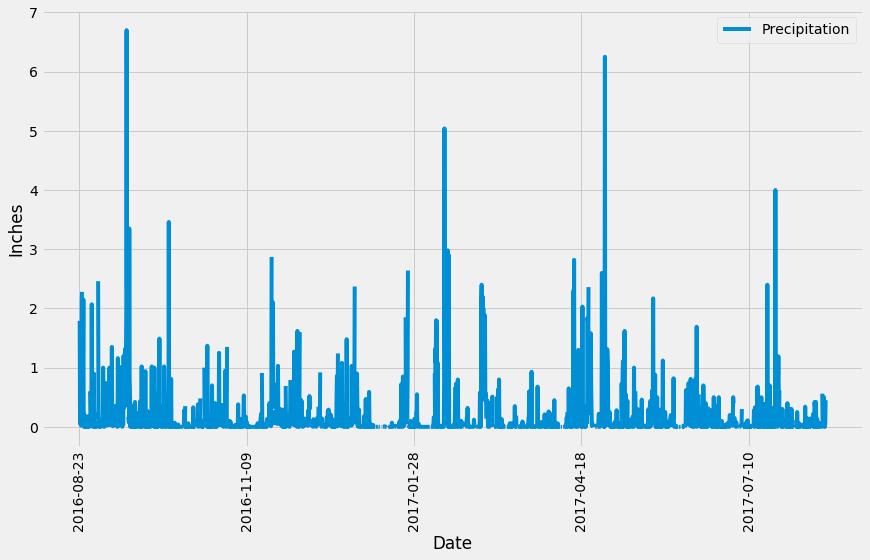

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data

# ax = precip_data.plot(kind='bar')
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# plt.show()

fig, ax = plt.subplots(figsize=(12,8))
precip_data.plot(ax=ax)
plt.xticks(rotation=90)
plt.tight_layout()

# x = year_precip_df['Date']
# y = year_precip_df['Precip. in Inches']

# plt.bar(x, y)
# plt.xlabel("Dates")
plt.ylabel("Inches")

# plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [20]:
# Design a query to show how many stations are available in this dataset?

stations = session.query(Measurement).group_by(Measurement.station).count()
stations

# unique_stations = year_precip_df['Station'].nunique()
# unique_stations

9

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# station_counts = year_precip_df['Station'].value_counts(ascending=False)
# station_counts

active_stations = (session.query(Measurement.station, func.count(Measurement.station).\
                                label("Count")).\
                                   group_by(Measurement.station).order_by(desc("Count"))).all()

for station, count in active_stations:
    print(f'{station}: {count}')
    print("-"*17)

USC00519281: 2772
-----------------
USC00519397: 2724
-----------------
USC00513117: 2709
-----------------
USC00519523: 2669
-----------------
USC00516128: 2612
-----------------
USC00514830: 2202
-----------------
USC00511918: 1979
-----------------
USC00517948: 1372
-----------------
USC00518838: 511
-----------------


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# station_temp = year_precip_df.loc[year_precip_df['Station'] == 'USC00519397']

# temp_max = station_temp['Temp'].max(skipna = True)
# temp_min = station_temp['Temp'].min(skipna = True)
# temp_avg = station_temp['Temp'].mean(skipna = True)

temp_max = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").scalar()
temp_min = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").scalar()
temp_avg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").scalar()

# for result in temp_max:
print(f'Max Temp for Station USC005192817: {temp_max}')
print("-"*60)
    
# for result in temp_min:
print(f'Min Temp for Station USC005192817: {temp_min}')
print("-"*60)
    
# for result in temp_avg:
print(f'Average Temp for Station USC005192817: {temp_avg}')
print("-"*60)

Max Temp for Station USC005192817: 85.0
------------------------------------------------------------
Min Temp for Station USC005192817: 54.0
------------------------------------------------------------
Average Temp for Station USC005192817: 71.66378066378067
------------------------------------------------------------


Text(0, 0.5, 'Frequency')

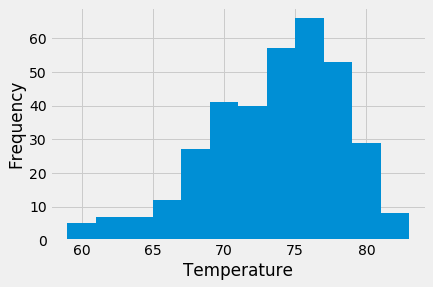

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# station_temp = []

year_temp = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.date <= '2017-08-23').filter(Measurement.station == "USC00519281").all()

station_temp = list(np.ravel(year_temp))

# year_temp_df = pd.DataFrame(year_temp, columns=["tobs"])

# for temp in year_temp:
#     station_temp.append(temp[0])   
    
plt.hist(station_temp, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

## Bonus Challenge Assignment

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
